In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt

### Sinusoidal Embedding

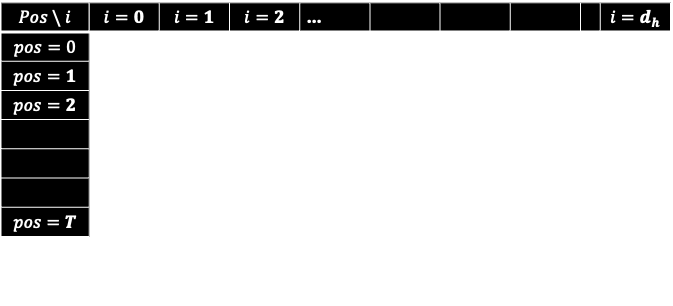

In [2]:
T = 100
dh = 64
k = 10_000

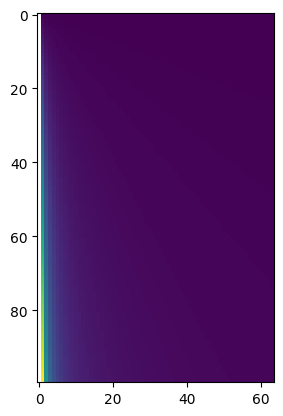

In [3]:
pos_idxs = torch.arange(T).unsqueeze(1) # T, 1
dh_idxs = torch.arange(dh).unsqueeze(0) # 1, dh

plt.imshow((pos_idxs / dh_idxs))

`even`: $ PE(pos, 2i) = Sin(\frac{pos}{term}) $

`odd`: $ PE(pos, 2i+1) = Cos(\frac{pos}{term}) $

`term`: $k^{2i/d_h}$ 

$K = 10,000$ (frequency of waves)

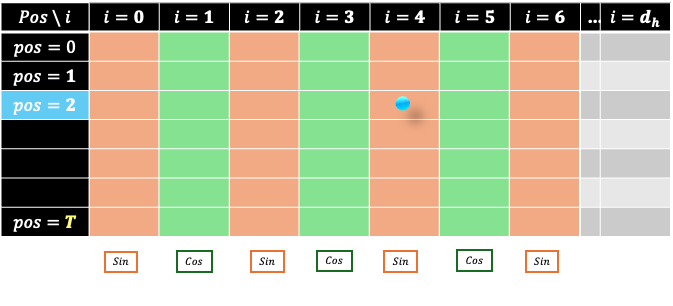

`term`: $k^{2i/d_h}$ 

- $\vec{i} : (1, dh)$
- $\vec{pos} : (T, 1)$


In [16]:
7.4989e+01

74.989

In [14]:
term.min(), term.max(), term

(tensor(1.),
 tensor(7498.9419),
 tensor([[1.0000e+00, 1.0000e+00, 1.3335e+00, 1.3335e+00, 1.7783e+00, 1.7783e+00,
          2.3714e+00, 2.3714e+00, 3.1623e+00, 3.1623e+00, 4.2170e+00, 4.2170e+00,
          5.6234e+00, 5.6234e+00, 7.4989e+00, 7.4989e+00, 1.0000e+01, 1.0000e+01,
          1.3335e+01, 1.3335e+01, 1.7783e+01, 1.7783e+01, 2.3714e+01, 2.3714e+01,
          3.1623e+01, 3.1623e+01, 4.2170e+01, 4.2170e+01, 5.6234e+01, 5.6234e+01,
          7.4989e+01, 7.4989e+01, 1.0000e+02, 1.0000e+02, 1.3335e+02, 1.3335e+02,
          1.7783e+02, 1.7783e+02, 2.3714e+02, 2.3714e+02, 3.1623e+02, 3.1623e+02,
          4.2170e+02, 4.2170e+02, 5.6234e+02, 5.6234e+02, 7.4989e+02, 7.4989e+02,
          1.0000e+03, 1.0000e+03, 1.3335e+03, 1.3335e+03, 1.7783e+03, 1.7783e+03,
          2.3714e+03, 2.3714e+03, 3.1623e+03, 3.1623e+03, 4.2170e+03, 4.2170e+03,
          5.6234e+03, 5.6234e+03, 7.4989e+03, 7.4989e+03]]))

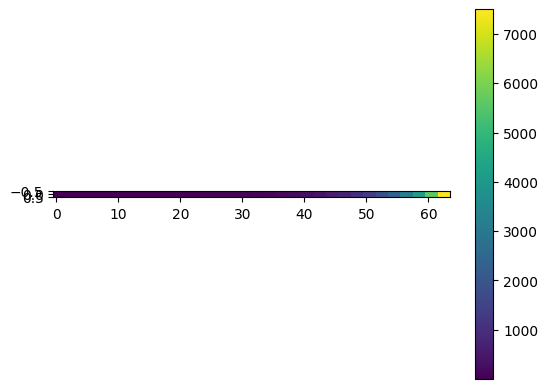

In [7]:
plt.imshow(term)
plt.colorbar()

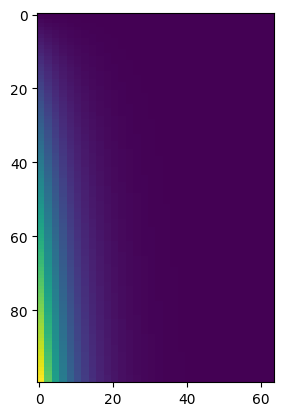

In [4]:
# 2i/dh
term = k ** ((2 * (dh_idxs//2)) / dh)

angles = pos_idxs / term

plt.imshow(angles)

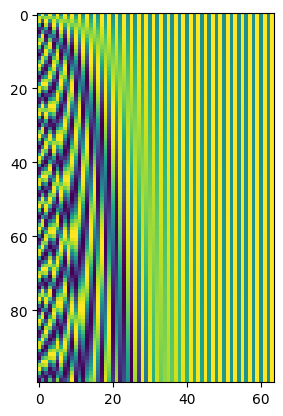

In [29]:
angles_p = torch.zeros_like(angles)
angles_p[:, 0::2] = torch.sin(angles[:, 0::2])
angles_p[:, 1::2] = torch.cos(angles[:, 1::2])


plt.imshow(angles_p)

In [ ]:
import torch
import math


def sinusoidal_position_encoding(T, dh, device=None, dtype=torch.float32):
    """
    Returns sinusoidal positional embeddings of shape [T, dh].

    Args:
        T: int, maximum sequence length
        dh: int, embedding dimension
        device: torch device
        dtype: torch dtype

    """
    # positions: [T, 1]
    positions = torch.arange(T, device=device, dtype=dtype).unsqueeze(1)

    # dh index: [1, dh]
    dh_indices = torch.arange(dh, device=device, dtype=dtype).unsqueeze(0)

    # compute the frequencies (denominator term)
    # 10000^(2i/d)
    # dh_indicies//2 --> since we need sin(f_i) and also cos(f_i)
    # if we didn't divide by //2 --> sin(f_i), cos(f_i+1) ...
    exponent = (2 * (dh_indices // 2)) / dh
    div_term = torch.pow(10000.0, exponent)  # [1, dh]

    # angles = pos / (10000^(2i/d))
    angles = positions / div_term  # [T, dh]

    # apply sin to even dhs, cos to odd dhs
    encoding = torch.zeros_like(angles)
    encoding[:, 0::2] = torch.sin(angles[:, 0::2])  # even dhensions
    encoding[:, 1::2] = torch.cos(angles[:, 1::2])  # odd dhensions

    return encoding